<a href="https://colab.research.google.com/github/KhuzaimaHassan/Data-Mining/blob/main/DM_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

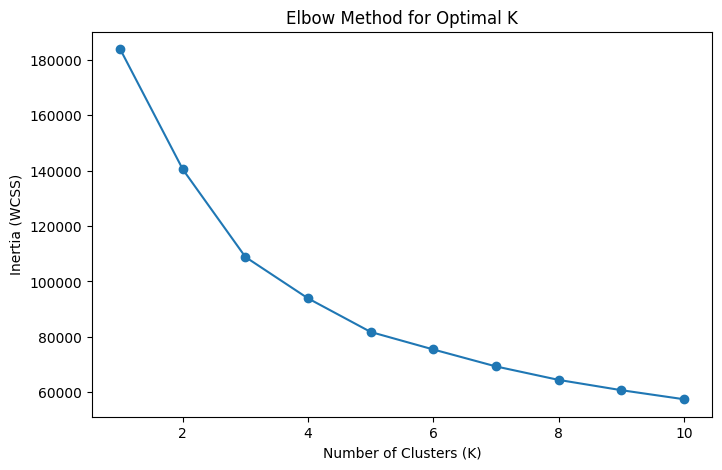

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('housing.csv')

numeric_columns = df.select_dtypes(include=[np.number]).columns
data = df[numeric_columns].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()



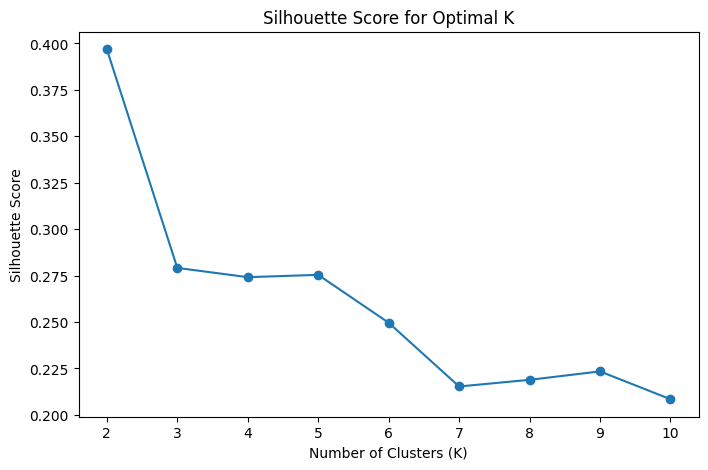

Cluster
0          10595
1           8168
2           1670
Name: count, dtype: int64


In [ ]:
# --- Silhouette Score to Evaluate Clustering ---
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

print(data[['Cluster']].value_counts())


In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
df = pd.read_csv('housing.csv')
df = df.dropna()

# Select numerical features and standardize
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numerical_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(2, 11)  # Test k from 2 to 10
kmeans_inertias = []
mbk_inertias = []
kmeans_times = []
mbk_times = []

for k in k_values:
    # K-Means
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_time = time.time() - start_time
    kmeans_inertias.append(kmeans.inertia_)
    kmeans_times.append(kmeans_time)

    # Mini-Batch K-Means (with batch size = 100)
    start_time = time.time()
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    mbk.fit(X_scaled)
    mbk_time = time.time() - start_time
    mbk_inertias.append(mbk.inertia_)
    mbk_times.append(mbk_time)

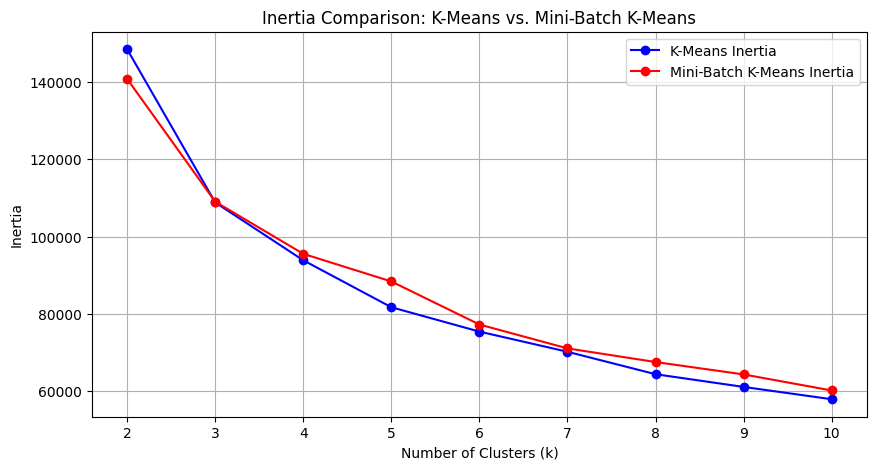

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, kmeans_inertias, 'bo-', label='K-Means Inertia')
plt.plot(k_values, mbk_inertias, 'ro-', label='Mini-Batch K-Means Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia Comparison: K-Means vs. Mini-Batch K-Means')
plt.legend()
plt.grid(True)
plt.show()

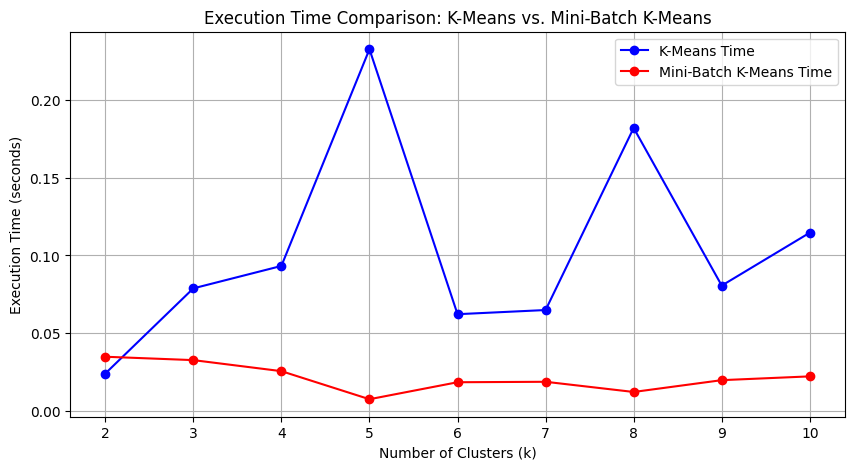

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, kmeans_times, 'bo-', label='K-Means Time')
plt.plot(k_values, mbk_times, 'ro-', label='Mini-Batch K-Means Time')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison: K-Means vs. Mini-Batch K-Means')
plt.legend()
plt.grid(True)
plt.show()